In [1]:
# libraries 

import random
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import cv2

import tensorflow as tf
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd 
import numpy as np


2023-07-14 15:20:48.277145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# # train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/train/'
# val_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/val/'
# test_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/finalized_aptos/test/'

In [3]:
# ## Using undersampled training set
# train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/dataset/under_sampled_aptos/train/'

In [24]:
train_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/script/3_class/dataset/train/'
val_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/script/3_class/dataset/val/'
test_dir = '/Users/sudeshgurung/Msc-Data_Analytics/dissertation/Project/script/3_class/dataset/test/'

## Variables


In [25]:
IMAGE_SIZE = 256
EPOCH = 20

# Image Pre-processing 

In [26]:
def custom_preprocessing(image):
    return cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , 5) ,-4 ,128)
    
    

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function = custom_preprocessing
)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
#     color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=24,
)

Found 2930 images belonging to 3 classes.


In [29]:
class_labels = list(train_generator.class_indices.keys())
class_labels

['NPDR', 'No_DR', 'PDR']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


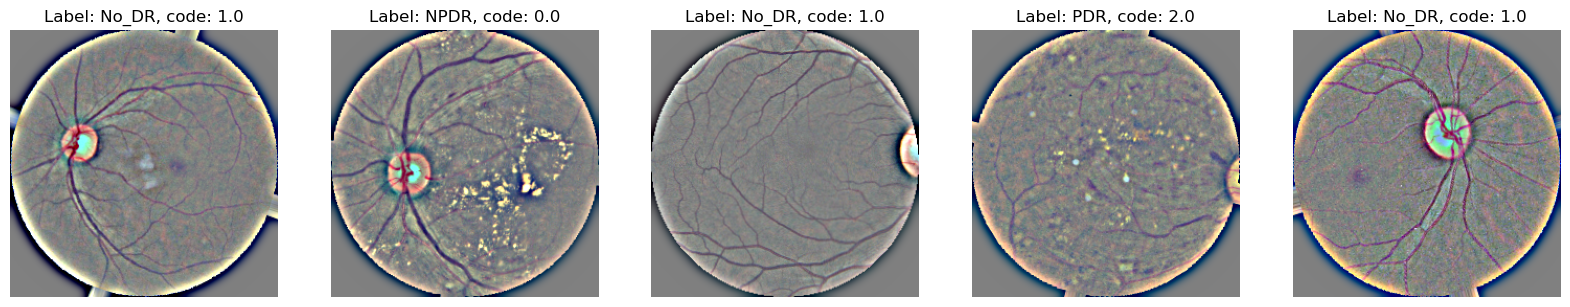

In [30]:

# Get the next batch of images and labels from the generator
images, labels = train_generator.next()

# Display the first 5 images from the batch
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(class_labels[int(labels[i])])+', code: {}'.format(labels[i]))
    ax.axis('off')

plt.show()

In [31]:
# for validation 
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function = custom_preprocessing
)

In [32]:
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=24,
#     color_mode='grayscale',
)

Found 366 images belonging to 3 classes.


In [33]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function = custom_preprocessing
)

In [34]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,
    seed=24,
#     color_mode='grayscale',
)

Found 366 images belonging to 3 classes.


In [35]:
class_labels_test_data = list(test_generator.class_indices.keys())
class_labels_test_data

['NPDR', 'No_DR', 'PDR']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

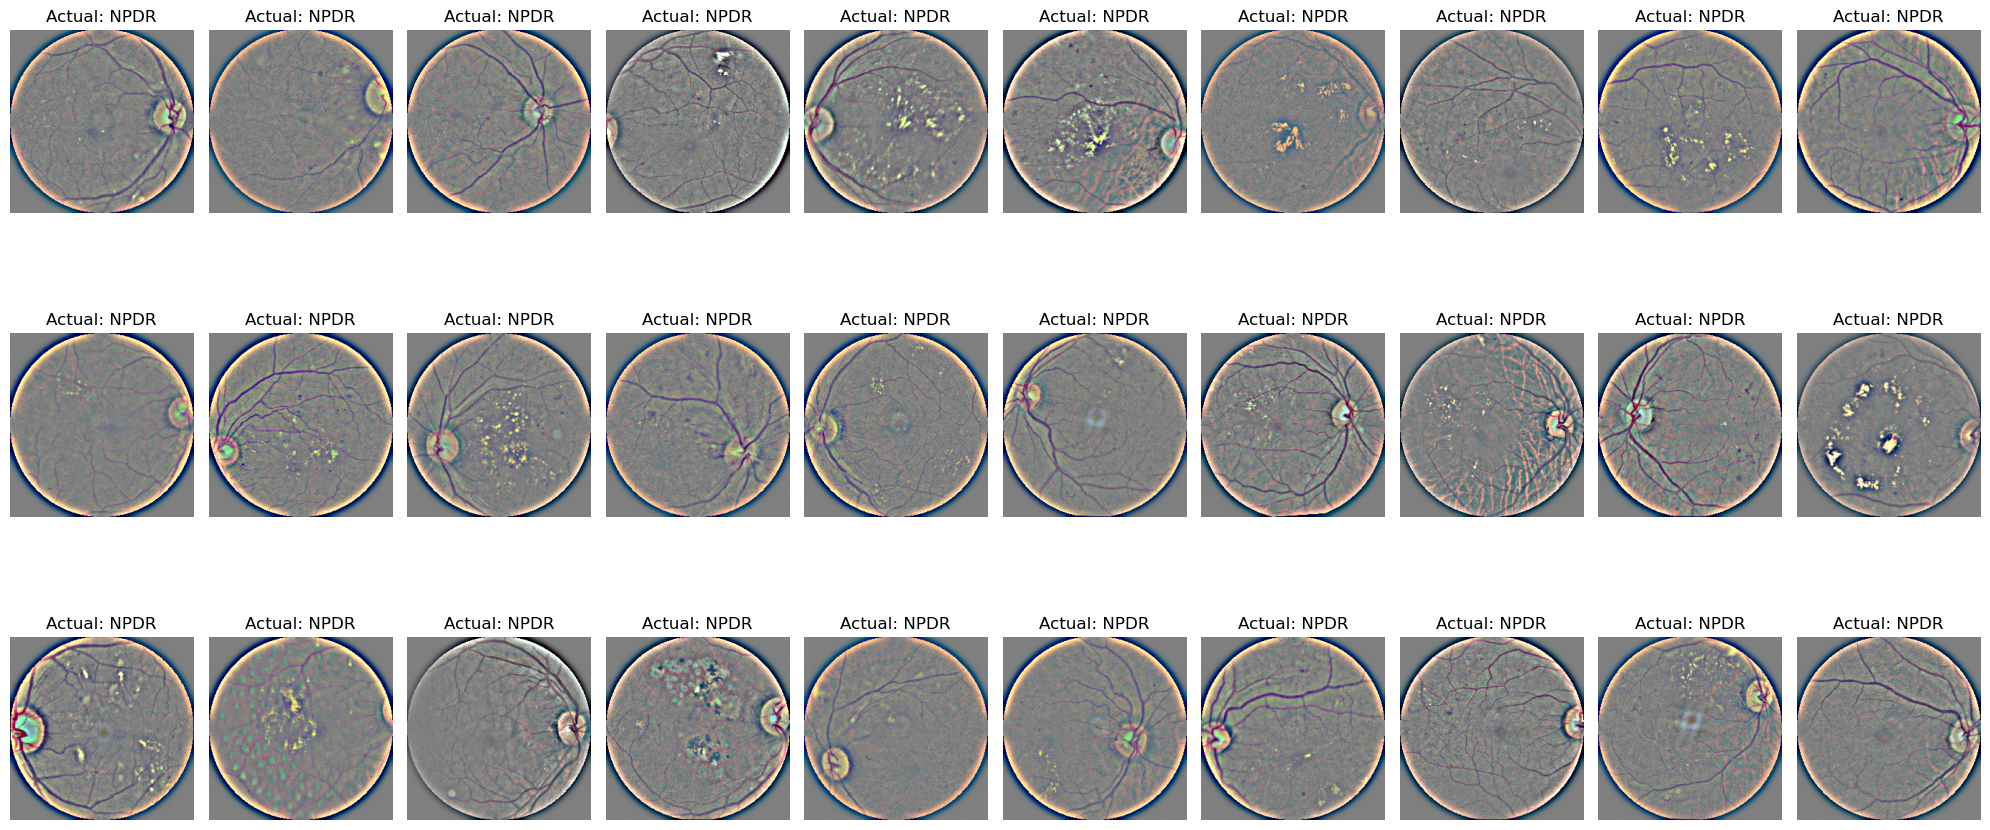

In [36]:
images, labels = test_generator.next()

# Display the first 30 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Actual: {}'.format(class_labels_test_data[int(labels[i])]))
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model creation

In [37]:
# InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))



In [38]:
# for layer in InceptionV3_model.layers:
#     layer.trainable = False

In [39]:
# model = Sequential()
# model.add(InceptionV3_model)
# # model.add(Dropout(0.25))
# model.add(Flatten()),
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(5, activation='softmax'))

In [40]:
dense_net = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    pooling=None
)

In [41]:
for layer in dense_net.layers:
    layer.trainable = False

In [42]:
model = Sequential()
model.add(dense_net)
# model.add(Dropout(0.25))
model.add(Flatten()),
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [43]:
# model = keras.Sequential([
#     keras.layers.Conv2D(32, 3, input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), activation='relu'),
#     keras.layers.MaxPooling2D(),
    
#     keras.layers.Conv2D(64, 3, activation='relu'),
#     keras.layers.MaxPooling2D(),

    
# #     keras.layers.Conv2D(128, 3, activation='relu'),
# #     keras.layers.MaxPooling2D(),
    
#     keras.layers.Conv2D(256, 3, activation='relu'),
#     keras.layers.MaxPooling2D(),
    
# #     keras.layers.Conv2D(512, 3, activation='relu'),
# #     keras.layers.MaxPooling2D(),
    
#     keras.layers.Dropout(0.25),
    
#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.25),
    
# #     keras.layers.Dense(1024, activation='relu'),

    
#     keras.layers.Dense(512, activation='relu'),
    
        
#     keras.layers.Dense(256, activation='relu'),

    
#     keras.layers.Dense(5, activation='softmax')
    
# ])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 40,666,693
Trainable params: 33,629,189
No

In [45]:
from keras.callbacks import ReduceLROnPlateau

In [46]:
# hyper-parameters
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,
                              verbose=0, mode='auto', min_delta=0.0001,
                              cooldown=0, min_lr=0)
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [47]:
h = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCH,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    callbacks=[reduce_lr,early_stopping],

)

Epoch 1/20
91/91 [==============================] - 1889s 20s/step - loss: 3.8530 - accuracy: 0.6391 - val_loss: 2.7134 - val_accuracy: 0.5057 - lr: 0.0010
Epoch 2/20
91/91 [==============================] - 1405s 15s/step - loss: 1.4371 - accuracy: 0.7519 - val_loss: 0.4961 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 3/20
91/91 [==============================] - 1424s 16s/step - loss: 0.8041 - accuracy: 0.7757 - val_loss: 0.4599 - val_accuracy: 0.8324 - lr: 0.0010
Epoch 4/20
91/91 [==============================] - 1052s 11s/step - loss: 0.6885 - accuracy: 0.7978 - val_loss: 0.4627 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/20
91/91 [==============================] - 1039s 11s/step - loss: 0.5923 - accuracy: 0.8112 - val_loss: 0.5751 - val_accuracy: 0.8097 - lr: 0.0010
Epoch 6/20
91/91 [==============================] - 1099s 12s/step - loss: 0.5364 - accuracy: 0.8102 - val_loss: 0.4918 - val_accuracy: 0.7983 - lr: 0.0010
Epoch 7/20
91/91 [==============================] - 1248s 14s/st

In [48]:
def visualize_performance(history):
    #Visualizing the training performance
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='val_Loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')

    plt.title('Loss evolution')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy evolution')

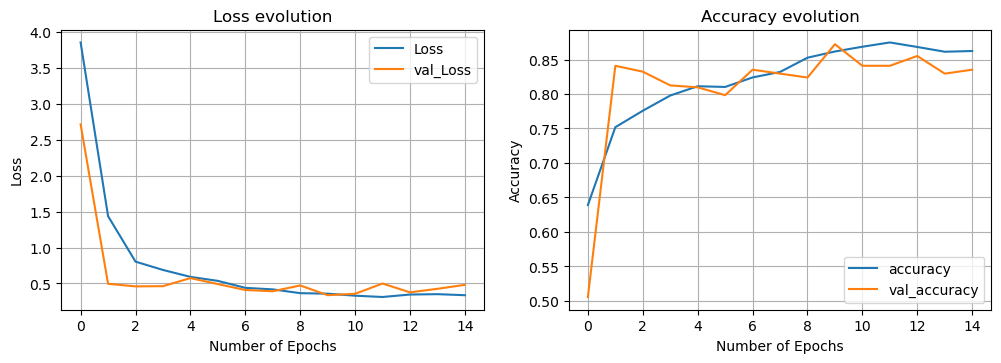

In [49]:
visualize_performance(h)

In [50]:
model.evaluate(test_generator)

12/12 [==============================] - 187s 14s/step - loss: 0.5105 - accuracy: 0.8197


[0.5104606747627258, 0.8196721076965332]

In [51]:
predictions = model.predict(test_generator, steps=test_generator.samples/test_generator.batch_size)
predictions

11/11 [==============================] - 188s 14s/step


array([[9.75081086e-01, 4.17797547e-03, 2.07401924e-02, 4.91422668e-07,
        1.78028515e-07],
       [9.14967120e-01, 2.40449775e-02, 6.09836876e-02, 1.13133967e-06,
        3.06290440e-06],
       [9.20953214e-01, 6.67561069e-02, 1.22903995e-02, 1.73788806e-07,
        1.36487515e-07],
       ...,
       [8.66721392e-01, 6.26617111e-05, 1.33211553e-01, 4.38282495e-06,
        1.39115286e-09],
       [9.43320930e-01, 2.25255455e-04, 5.64483032e-02, 5.44531895e-06,
        1.84369782e-08],
       [9.12882924e-01, 3.37568636e-05, 8.70540142e-02, 2.93973553e-05,
        3.82495635e-09]], dtype=float32)

In [52]:
predicted_classes = [np.argmax(pred) for pred in predictions]
predicted_classes[:30]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [53]:
true_classes = test_generator.classes
true_classes[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [54]:
class_labels_test_data = list(test_generator.class_indices.keys())
class_labels_test_data

['NPDR', 'No_DR', 'PDR']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

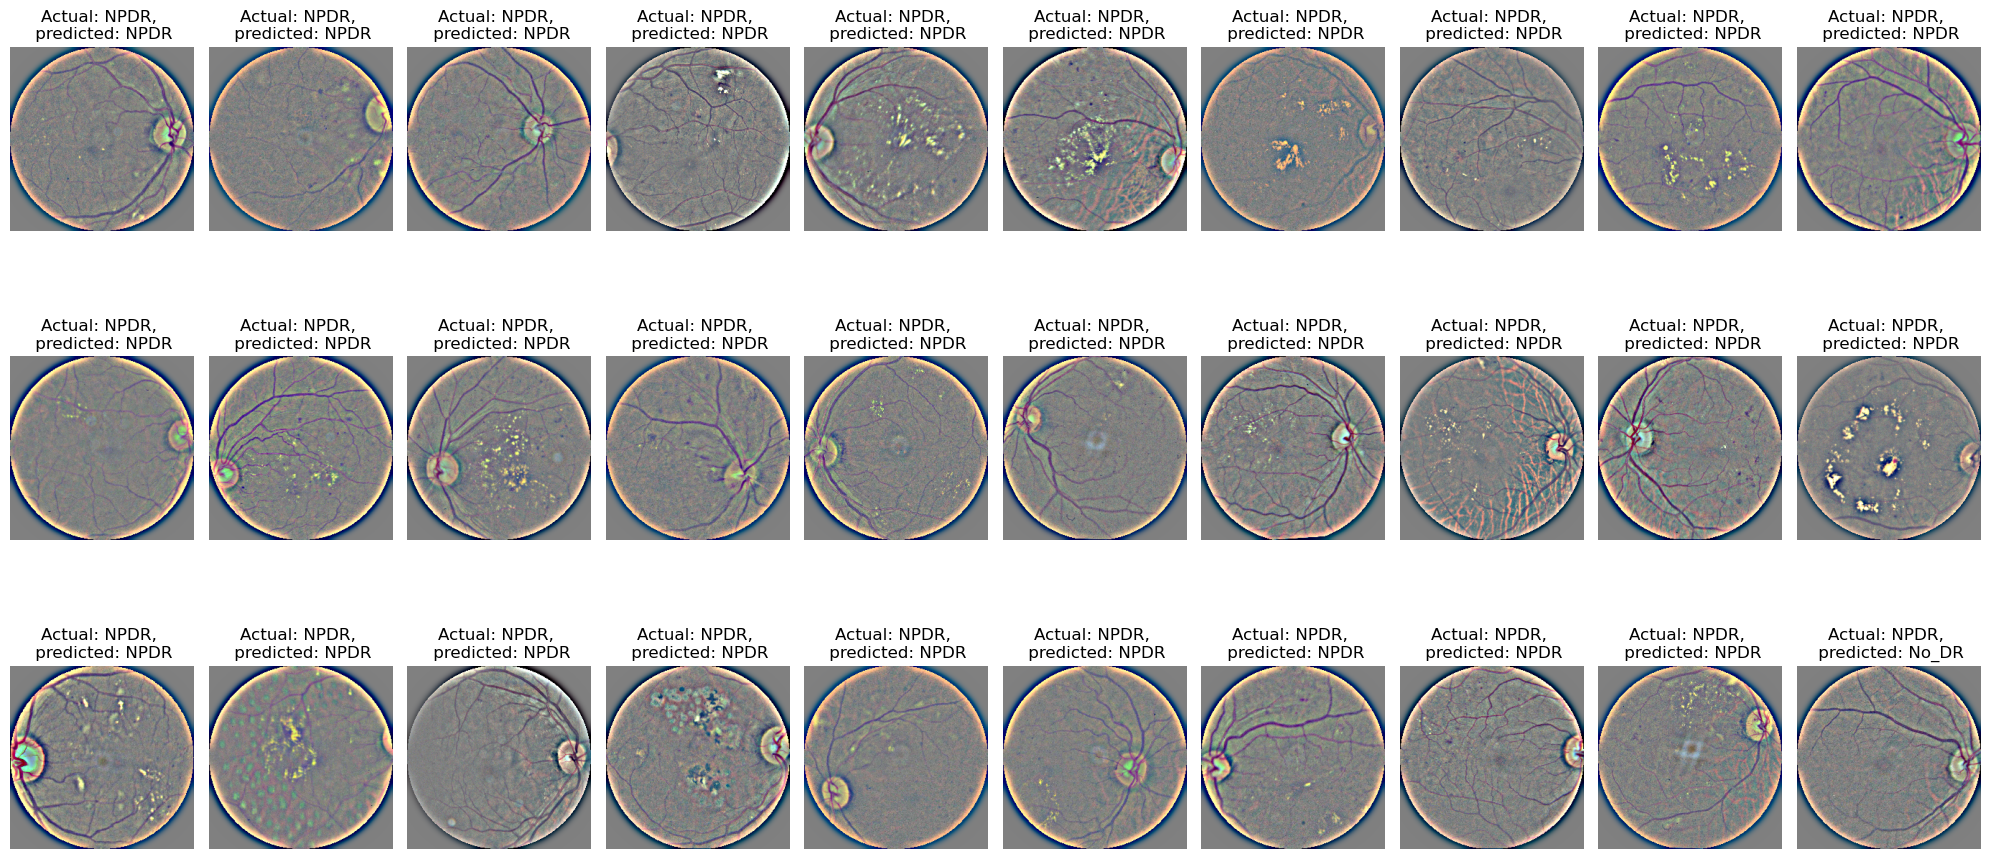

In [55]:
# Get the next batch of images and labels from the generator
# images, labels = test_generator.next()

# Display the first 30 images from the batch
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.set_title('Actual: {}'.format(class_labels_test_data[int(labels[i])])+', \n predicted: {}'.format(class_labels_test_data[predicted_classes[i]]))
    ax.axis('off')

plt.tight_layout()
plt.show()

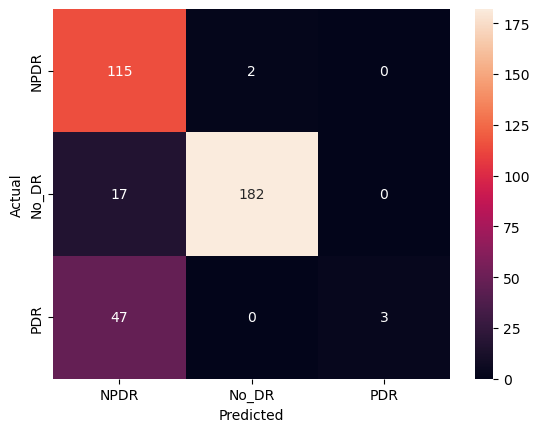

In [56]:
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels_test_data, yticklabels= class_labels_test_data)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [57]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels_test_data)
print(report) 

              precision    recall  f1-score   support

        NPDR       0.64      0.98      0.78       117
       No_DR       0.99      0.91      0.95       199
         PDR       1.00      0.06      0.11        50

    accuracy                           0.82       366
   macro avg       0.88      0.65      0.61       366
weighted avg       0.88      0.82      0.78       366

